In [7]:
import geopandas as gpd
import os
import pandas as pd

def fusionner_shp_algerie_tunisie(shp_algerie, shp_tunisie, output_shp):
    """
    Fusionne les shapefiles Algérie et Tunisie
    """
    print("🔄 Fusion des shapefiles...")
    
    # 1. Lire les deux shapefiles
    gdf_algerie = gpd.read_file(shp_algerie)
    gdf_tunisie = gpd.read_file(shp_tunisie)
    
    print(f"Algérie: {len(gdf_algerie)} polygones")
    print(f"Tunisie: {len(gdf_tunisie)} polygones")
    
    # 2. Vérifier et harmoniser les CRS
    if gdf_algerie.crs != gdf_tunisie.crs:
        print(f"CRS différents: Algérie={gdf_algerie.crs}, Tunisie={gdf_tunisie.crs}")
        gdf_tunisie = gdf_tunisie.to_crs(gdf_algerie.crs)
        print("✓ CRS harmonisés")
    
    # 3. Vérifier la structure des colonnes
    colonnes_algerie = set(gdf_algerie.columns)
    colonnes_tunisie = set(gdf_tunisie.columns)
    
    print(f"Colonnes Algérie: {colonnes_algerie}")
    print(f"Colonnes Tunisie: {colonnes_tunisie}")
    
    # 4. Fusionner
    gdf_fusionne = pd.concat([gdf_algerie, gdf_tunisie], ignore_index=True)
    
    # 5. Ajouter une colonne pays pour identification
    gdf_fusionne['pays'] = ['Algérie'] * len(gdf_algerie) + ['Tunisie'] * len(gdf_tunisie)
    
    # 6. Sauvegarder
    gdf_fusionne.to_file(output_shp, driver='ESRI Shapefile')
    
    print(f"✅ Fusion réussie: {len(gdf_fusionne)} polygones → {output_shp}")
    return gdf_fusionne

# Utilisation
fusionner_shp_algerie_tunisie(
    "C:\\Users\\hp\\Desktop\\TPs\\DataMining\\DATA\\shapefile\\dza_gc_adg.shp",
    "C:\\Users\\hp\\Desktop\\TPs\\DataMining\\DATA\\shapefile\\tun_gc_adg.shp", 
    "landcover_algerie_tunisie.shp"
)

🔄 Fusion des shapefiles...
Algérie: 386454 polygones
Tunisie: 52059 polygones
Colonnes Algérie: {'ID', 'AREA', 'LCCCODE', 'GRIDCODE', 'geometry'}
Colonnes Tunisie: {'ID', 'LCCCode', 'AREA_M2', 'GRIDCODE', 'geometry'}


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'LCCCode' to 'LCCCode_1'
  ogr_write(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 459084147.94999999 of field AREA of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 233338208.68000001 of field AREA of feature 117 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 182894330.02000001 of field AREA of feature 119 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\hp\AppData\Local\Programs\Python\

✅ Fusion réussie: 438513 polygones → landcover_algerie_tunisie.shp


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 145439187 of field AREA_M2 of feature 437115 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 772016693 of field AREA_M2 of feature 437296 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 140303977 of field AREA_M2 of feature 437712 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 619135710 of field AREA_M2 of feature 438090 not successfully written. Possibly due to too larger number with resp

,ID,GRIDCODE,AREA,LCCCODE,geometry,AREA_M2,LCCCode,pays
0,4,210,6.228187e+06,7001 // 8001,"POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...",NaN,NaN,Algérie
1,2,210,6.242408e+06,7001 // 8001,"POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...",NaN,NaN,Algérie
2,1,210,1.482995e+06,7001 // 8001,"POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...",NaN,NaN,Algérie
3,8,50,4.590841e+08,21497-121340,"POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...",NaN,NaN,Algérie
4,13,210,6.371533e+06,7001 // 8001,"POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...",NaN,NaN,Algérie
...,...,...,...,...,...,...,...,...
438508,52055,201,NaN,NaN,"POLYGON ((9.62361 30.27083, 9.62361 30.26806, ...",164617.0,6001,Tunisie
438509,52058,200,NaN,NaN,"POLYGON ((9.56891 30.2625, 9.57361 30.2625, 9....",148220.0,0011,Tunisie
438510,52057,201,NaN,NaN,"POLYGON ((9.57053 30.25694, 9.57083 30.25694, ...",2797149.0,6001,Tunisie
438511,52056,201,NaN,NaN,"POLYGON ((9.62083 30.25972, 9.62083 30.25694, ...",658545.0,6001,Tunisie


📊 INFORMATIONS DU FICHIER FUSIONNÉ:
Nombre d'entités: 438513
Colonnes: ['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'AREA_M2', 'LCCCode_1', 'pays', 'geometry']
Type de géométrie: ['Polygon']
Répartition par pays: pays
Algérie    386454
Tunisie     52059
Name: count, dtype: int64


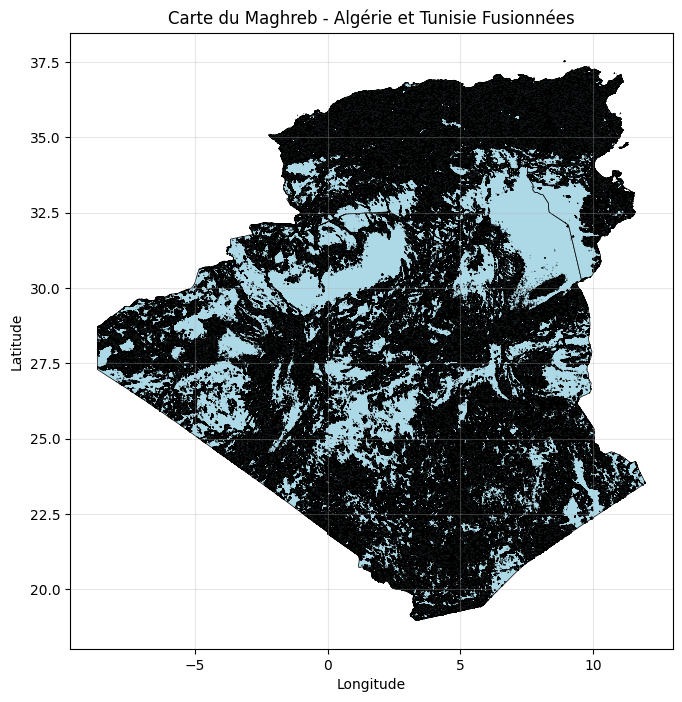

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

def afficher_shp_fusionne_simple():
    """
    Affichage simple du shapefile fusionné
    """
    # Charger le fichier fusionné
    shp_path = r"C:\Users\hp\Desktop\TPs\DataMining\DATA\shapefile\landcover_algerie_tunisie.shp"
    gdf = gpd.read_file(shp_path)
    
    print("📊 INFORMATIONS DU FICHIER FUSIONNÉ:")
    print(f"Nombre d'entités: {len(gdf)}")
    print(f"Colonnes: {list(gdf.columns)}")
    print(f"Type de géométrie: {gdf.geometry.type.unique()}")
    print(f"Répartition par pays: {gdf['pays'].value_counts()}")
    
    # Affichage basique
    fig, ax = plt.subplots(figsize=(12, 8))
    gdf.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.5)
    
    plt.title("Carte du Maghreb - Algérie et Tunisie Fusionnées")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return gdf

# Affichage simple
carte_simple = afficher_shp_fusionne_simple()